In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import r2_score, accuracy_score

# un primo banale test con dataset cemento

In [2]:
dataset = pd.read_csv('./content/concrete_data.csv')
dataset

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0               1040.0            676.0   28                          79.99  
1               1055.0            676.0   28                          61.89  
2                932.0            594.0  270                          40.27  
3                932.0            594.0  365                          41.05  
4                978.4            825.5  360                          44.30  
...                ...              ...  ...                            ...  
1025             870.1            768.3   28                          44.28  
1026             817.9            813.4   28                          31.18  
1027             892.4            780.0   28                          23.70  
1028             989.6            788.9   28                          32.77  
1029             864.5            761.5   28                          32.40  

[1030 rows x 9 columns]

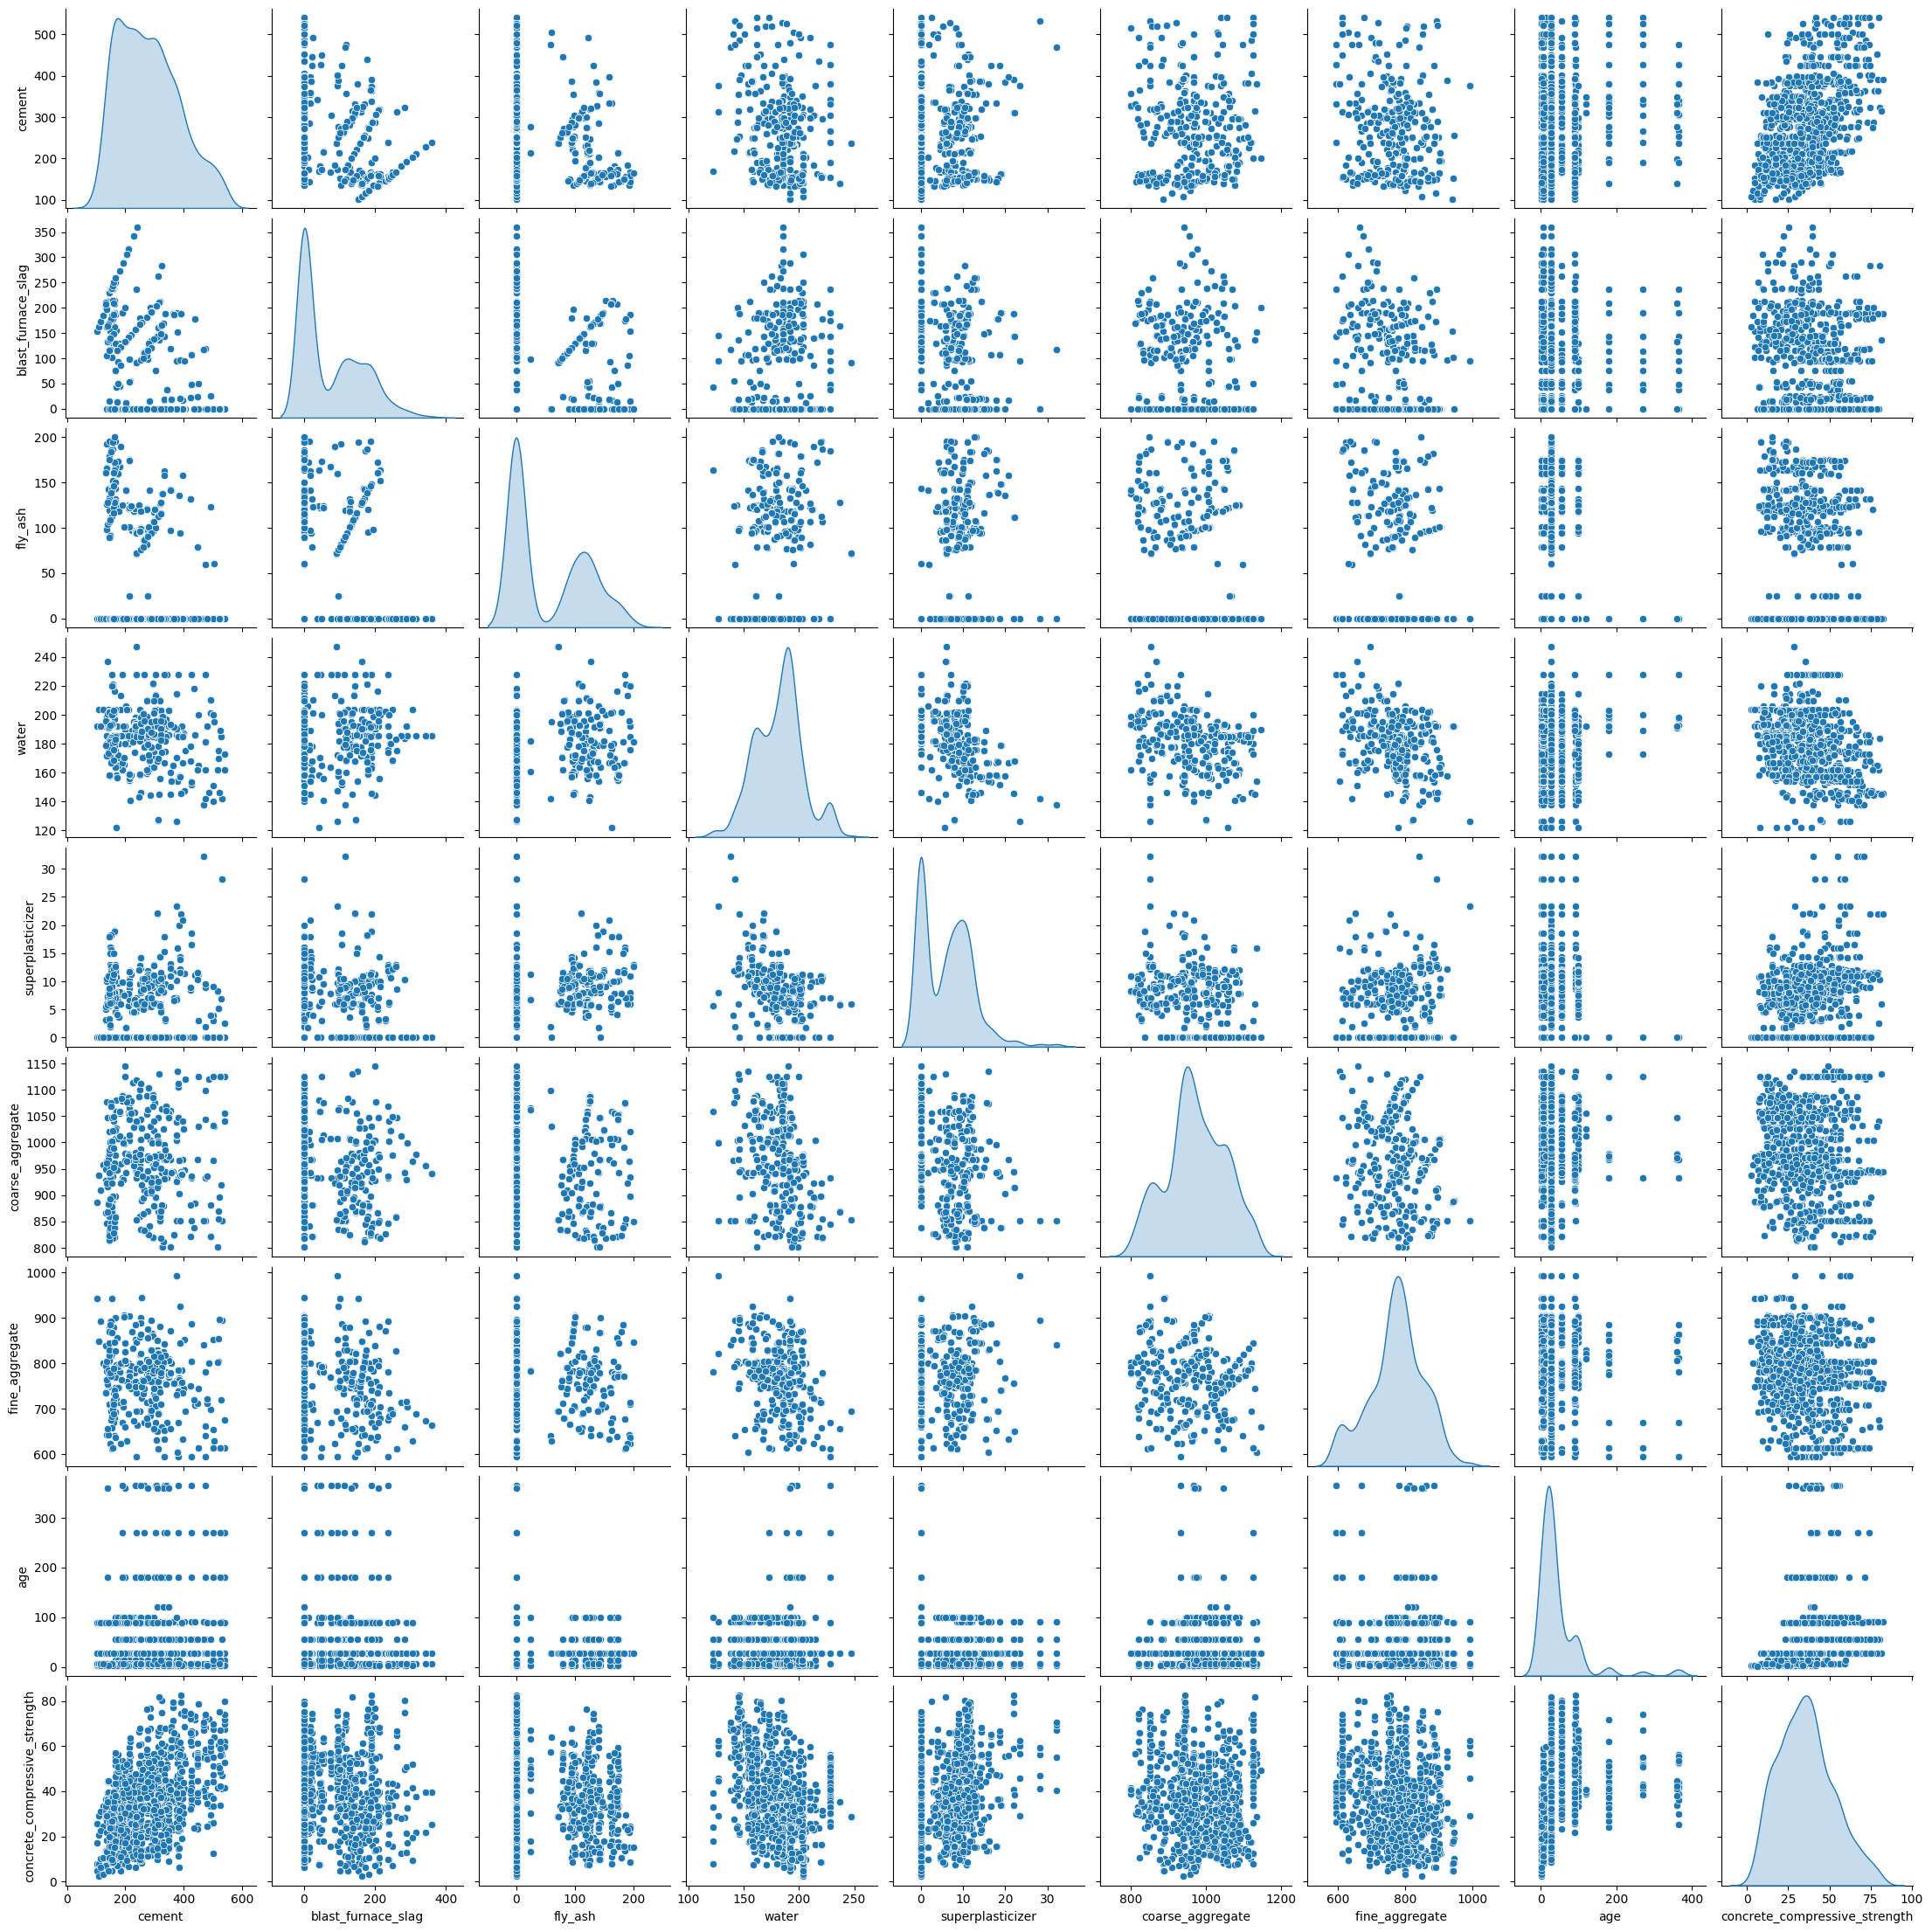

In [3]:
sns.pairplot(dataset, diag_kind = 'kde')

In [4]:
def models_creators(df, n_estimators=100, test_size = 0.5):
  df_train, df_test = train_test_split(df.values, test_size = test_size)

  models = list()

  for i, col_name in enumerate(df.columns):
    X = np.delete(df_train, i, axis=1)
    Y = df_train[:,i]
    reg = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    reg.fit(X, Y)

    models.append(reg)

    X_test = np.delete(df_test, i, axis=1)
    Y_test = df_test[:,i]

    Y_test_pred = reg.predict(X_test)

    print(f'col_name: {col_name}, r2_score: {r2_score(Y_test_pred, Y_test)}')

  return models,  df_train, df_test

In [5]:
models,  df_train, df_test = models_creators(dataset, n_estimators=100)

col_name: cement, r2_score: 0.8948602090164116
col_name: blast_furnace_slag, r2_score: 0.9162487637571346
col_name: fly_ash, r2_score: 0.9027721060059178
col_name: water, r2_score: 0.8776908831137346
col_name: superplasticizer, r2_score: 0.8985136645021135
col_name: coarse_aggregate, r2_score: 0.862967553053993
col_name: fine_aggregate , r2_score: 0.8438138145389963
col_name: age, r2_score: 0.15787084829926246
col_name: concrete_compressive_strength, r2_score: 0.8583713912672378


In [6]:
samples = list()
for s in range(515):
  # inizialaitaion of gibbs sampling from the traninig variable as if they were indipendnet
  # x = [np.random.choice(df_train[:,i]) for i in range(9)]
  x = [np.random.uniform(df_train[:,i].min(), df_train[:,i].max()) for i in range(9)]
  for n in range(12):
    for i, x_i in enumerate(x):
      trees = models[i].estimators_
      est_to_use = np.random.randint(len(trees))
      x[i] = trees[est_to_use].predict([x[:i]+x[i+1:]])[0]
  samples.append(x)
  if s%50==0:
    print(s)


0
50
100
150
200
250
300
350
400
450
500


In [7]:
dataset_simul = pd.DataFrame(samples, columns=dataset.columns)
dataset_simul


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0     339.0                 0.0      0.0  197.0               0.0   
1     289.0                 0.0      0.0  191.0               0.0   
2     531.3                 0.0    123.0  141.8              28.2   
3     141.9                 0.0    173.5  174.0              11.7   
4     157.0               238.2      0.0  203.5               0.0   
..      ...                 ...      ...    ...               ...   
510   295.8                 0.0      0.0  185.7               0.0   
511   275.1                 0.0    143.6  214.6              11.0   
512   152.0                 0.0    175.0  167.0              15.6   
513   349.0                 0.0      0.0  192.0               0.0   
514   141.3               236.0    161.0  160.6               8.0   

     coarse_aggregate  fine_aggregate     age  concrete_compressive_strength  
0              1025.0            821.0   90.0                          43.06  
1               968.0            856.0   14.0                          21.26  
2               852.1            830.0    7.0                          50.51  
3              1088.1            804.0   28.0                          17.95  
4               975.6            692.6   28.0                          33.05  
..                ...              ...    ...                            ...  
510            1091.4            795.0    7.0                          14.84  
511             861.0            737.0   14.0                          27.04  
512            1125.0            845.0   14.0                          19.42  
513             968.0            781.0    3.0                          15.05  
514            1000.0            748.5  100.0                          39.66  

[515 rows x 9 columns]

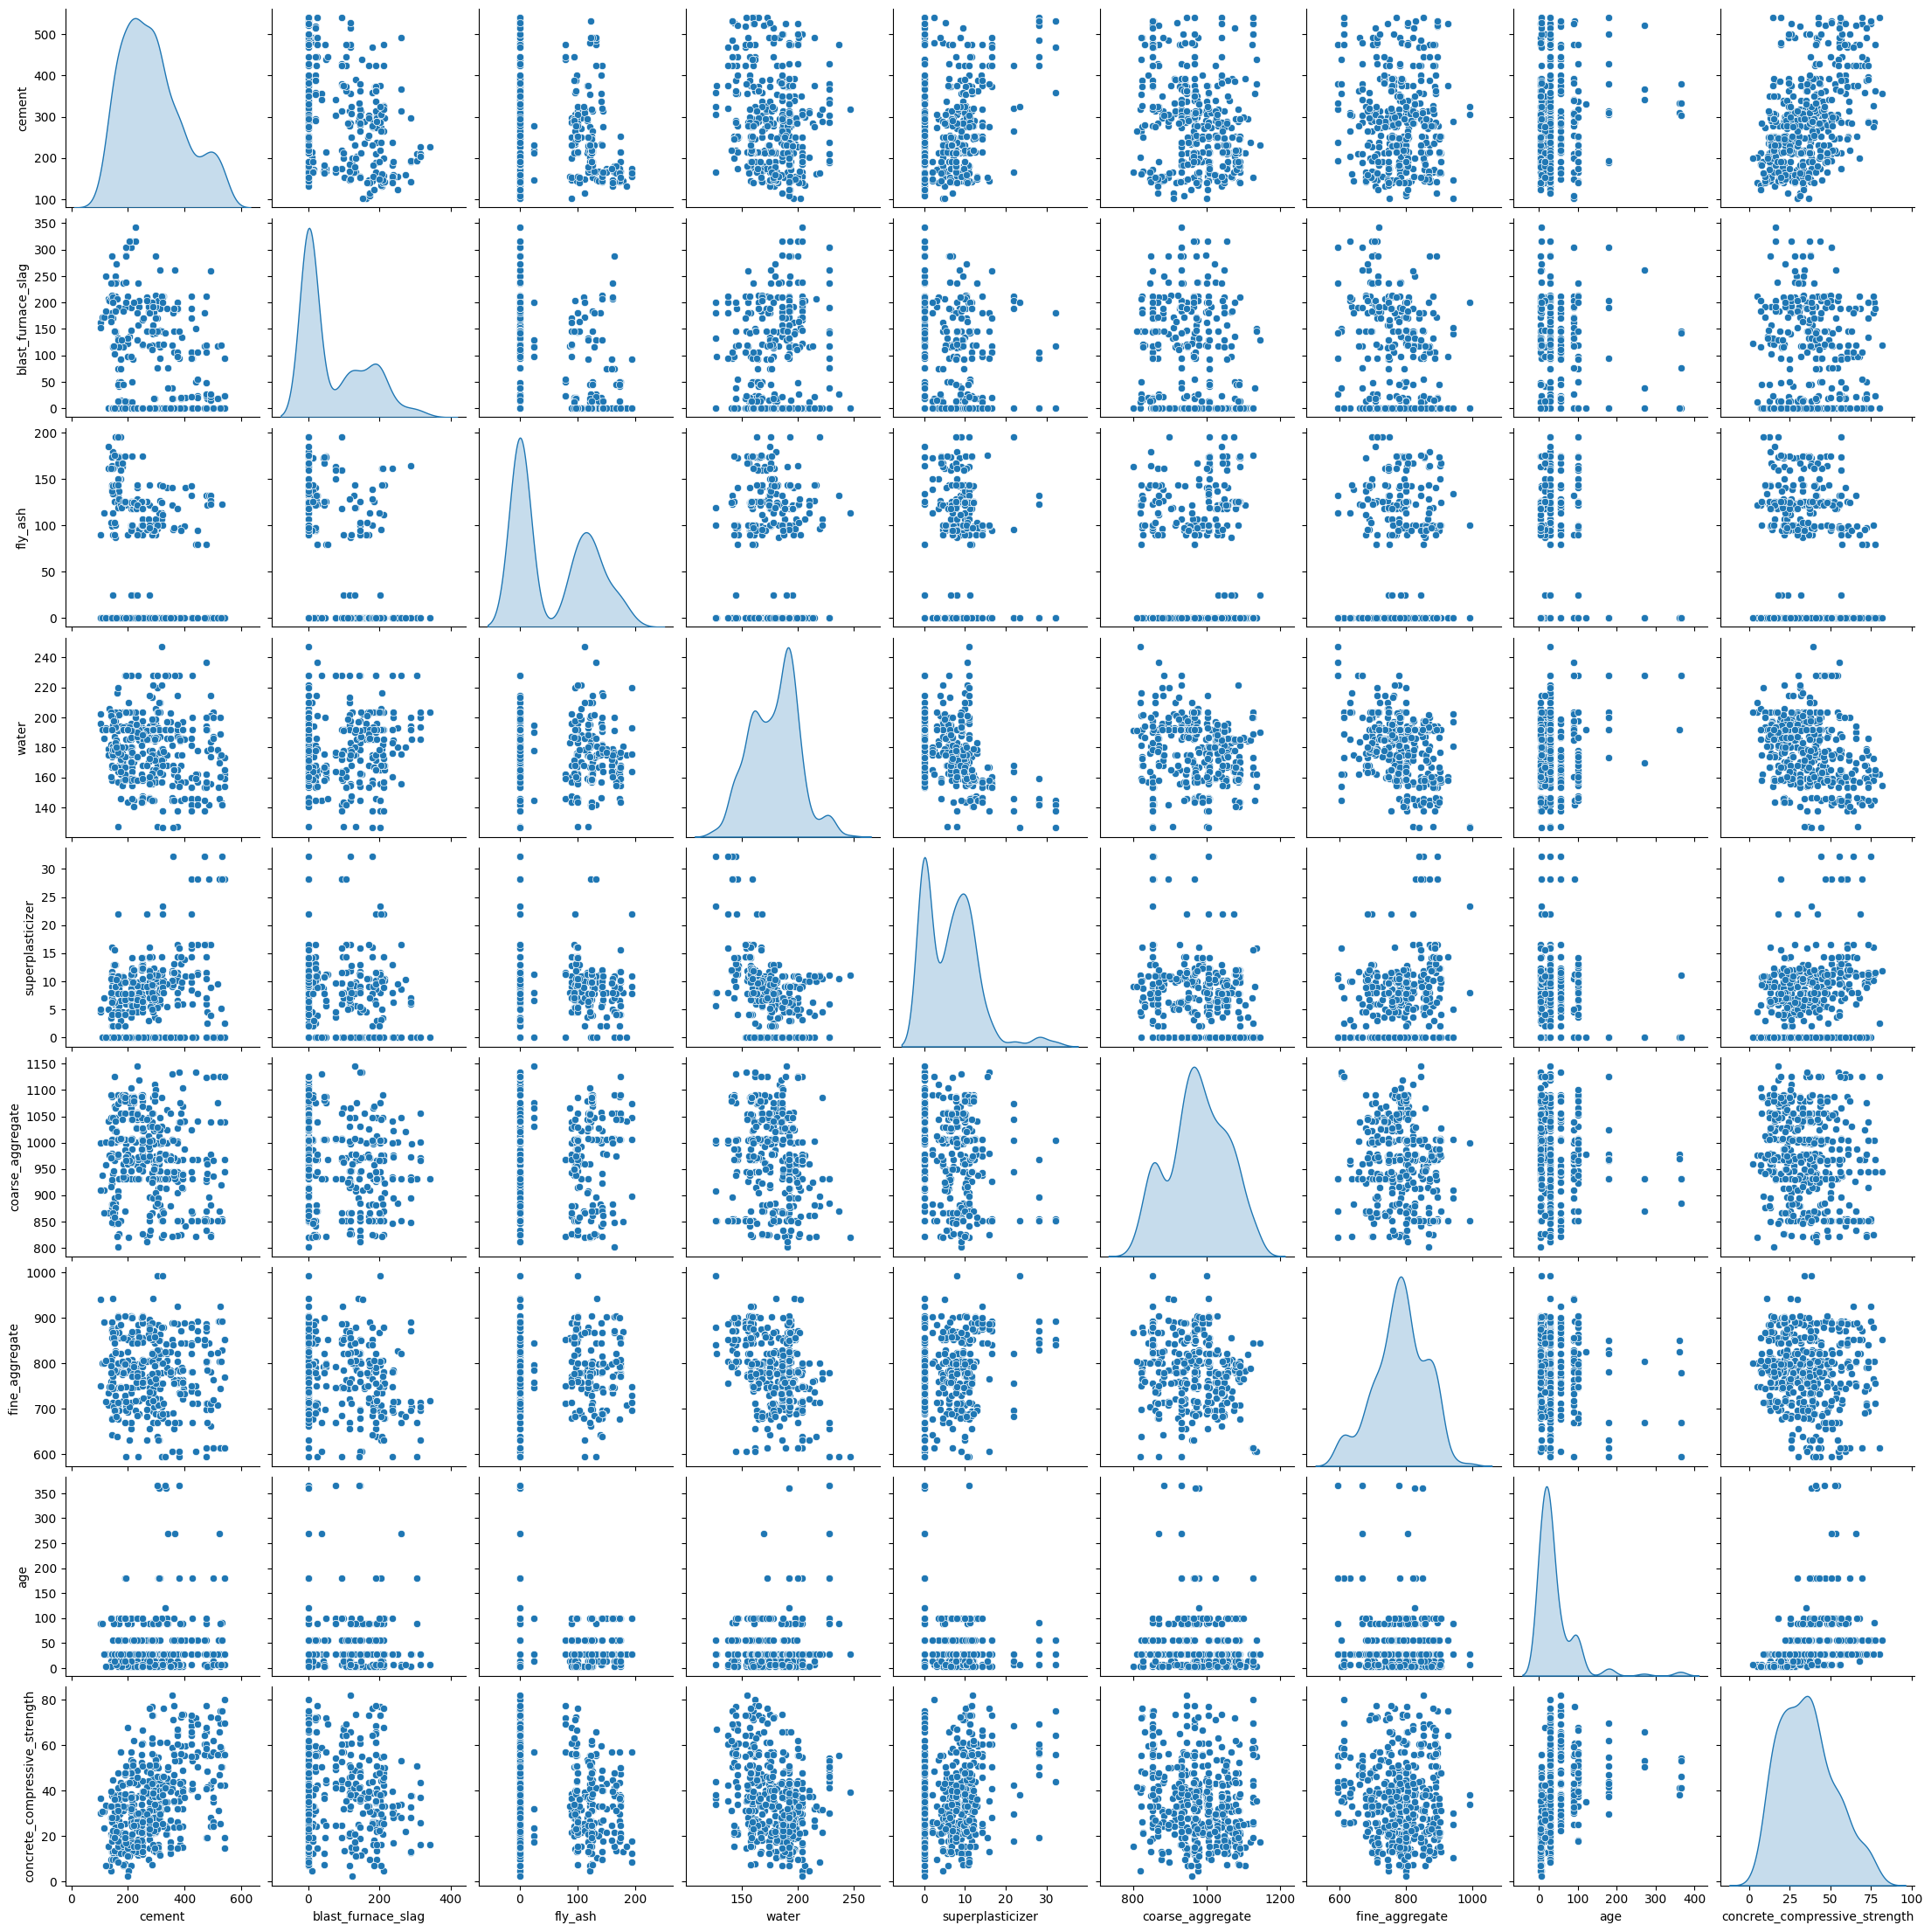

In [8]:
sns.pairplot(dataset_simul, diag_kind = 'kde')

In [9]:
dataset_simul['real'] = 0

test_dataset = pd.DataFrame(df_test, columns=dataset.columns)

test_dataset['real'] = 1
dataset_full = pd.concat([dataset_simul, test_dataset])
dataset_full


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0     339.0                 0.0      0.0  197.0               0.0   
1     289.0                 0.0      0.0  191.0               0.0   
2     531.3                 0.0    123.0  141.8              28.2   
3     141.9                 0.0    173.5  174.0              11.7   
4     157.0               238.2      0.0  203.5               0.0   
..      ...                 ...      ...    ...               ...   
510   362.6               189.0      0.0  164.9              11.6   
511   133.0               200.0      0.0  192.0               0.0   
512   385.0                 0.0      0.0  186.0               0.0   
513   376.0                 0.0      0.0  214.6               0.0   
514   350.0                 0.0      0.0  203.0               0.0   

     coarse_aggregate  fine_aggregate    age  concrete_compressive_strength  \
0              1025.0            821.0  90.0                          43.06   
1               968.0            856.0  14.0                          21.26   
2               852.1            830.0   7.0                          50.51   
3              1088.1            804.0  28.0                          17.95   
4               975.6            692.6  28.0                          33.05   
..                ...              ...   ...                            ...   
510             944.7            755.8  56.0                          77.30   
511             927.4            839.2  90.0                          36.59   
512             966.0            763.0   1.0                           6.27   
513            1003.5            762.4  56.0                          36.30   
514             974.0            775.0   7.0                          18.13   

     real  
0       0  
1       0  
2       0  
3       0  
4       0  
..    ...  
510     1  
511     1  
512     1  
513     1  
514     1  

[1030 rows x 10 columns]

In [10]:
dataset_full = dataset_full.reset_index(drop=True)

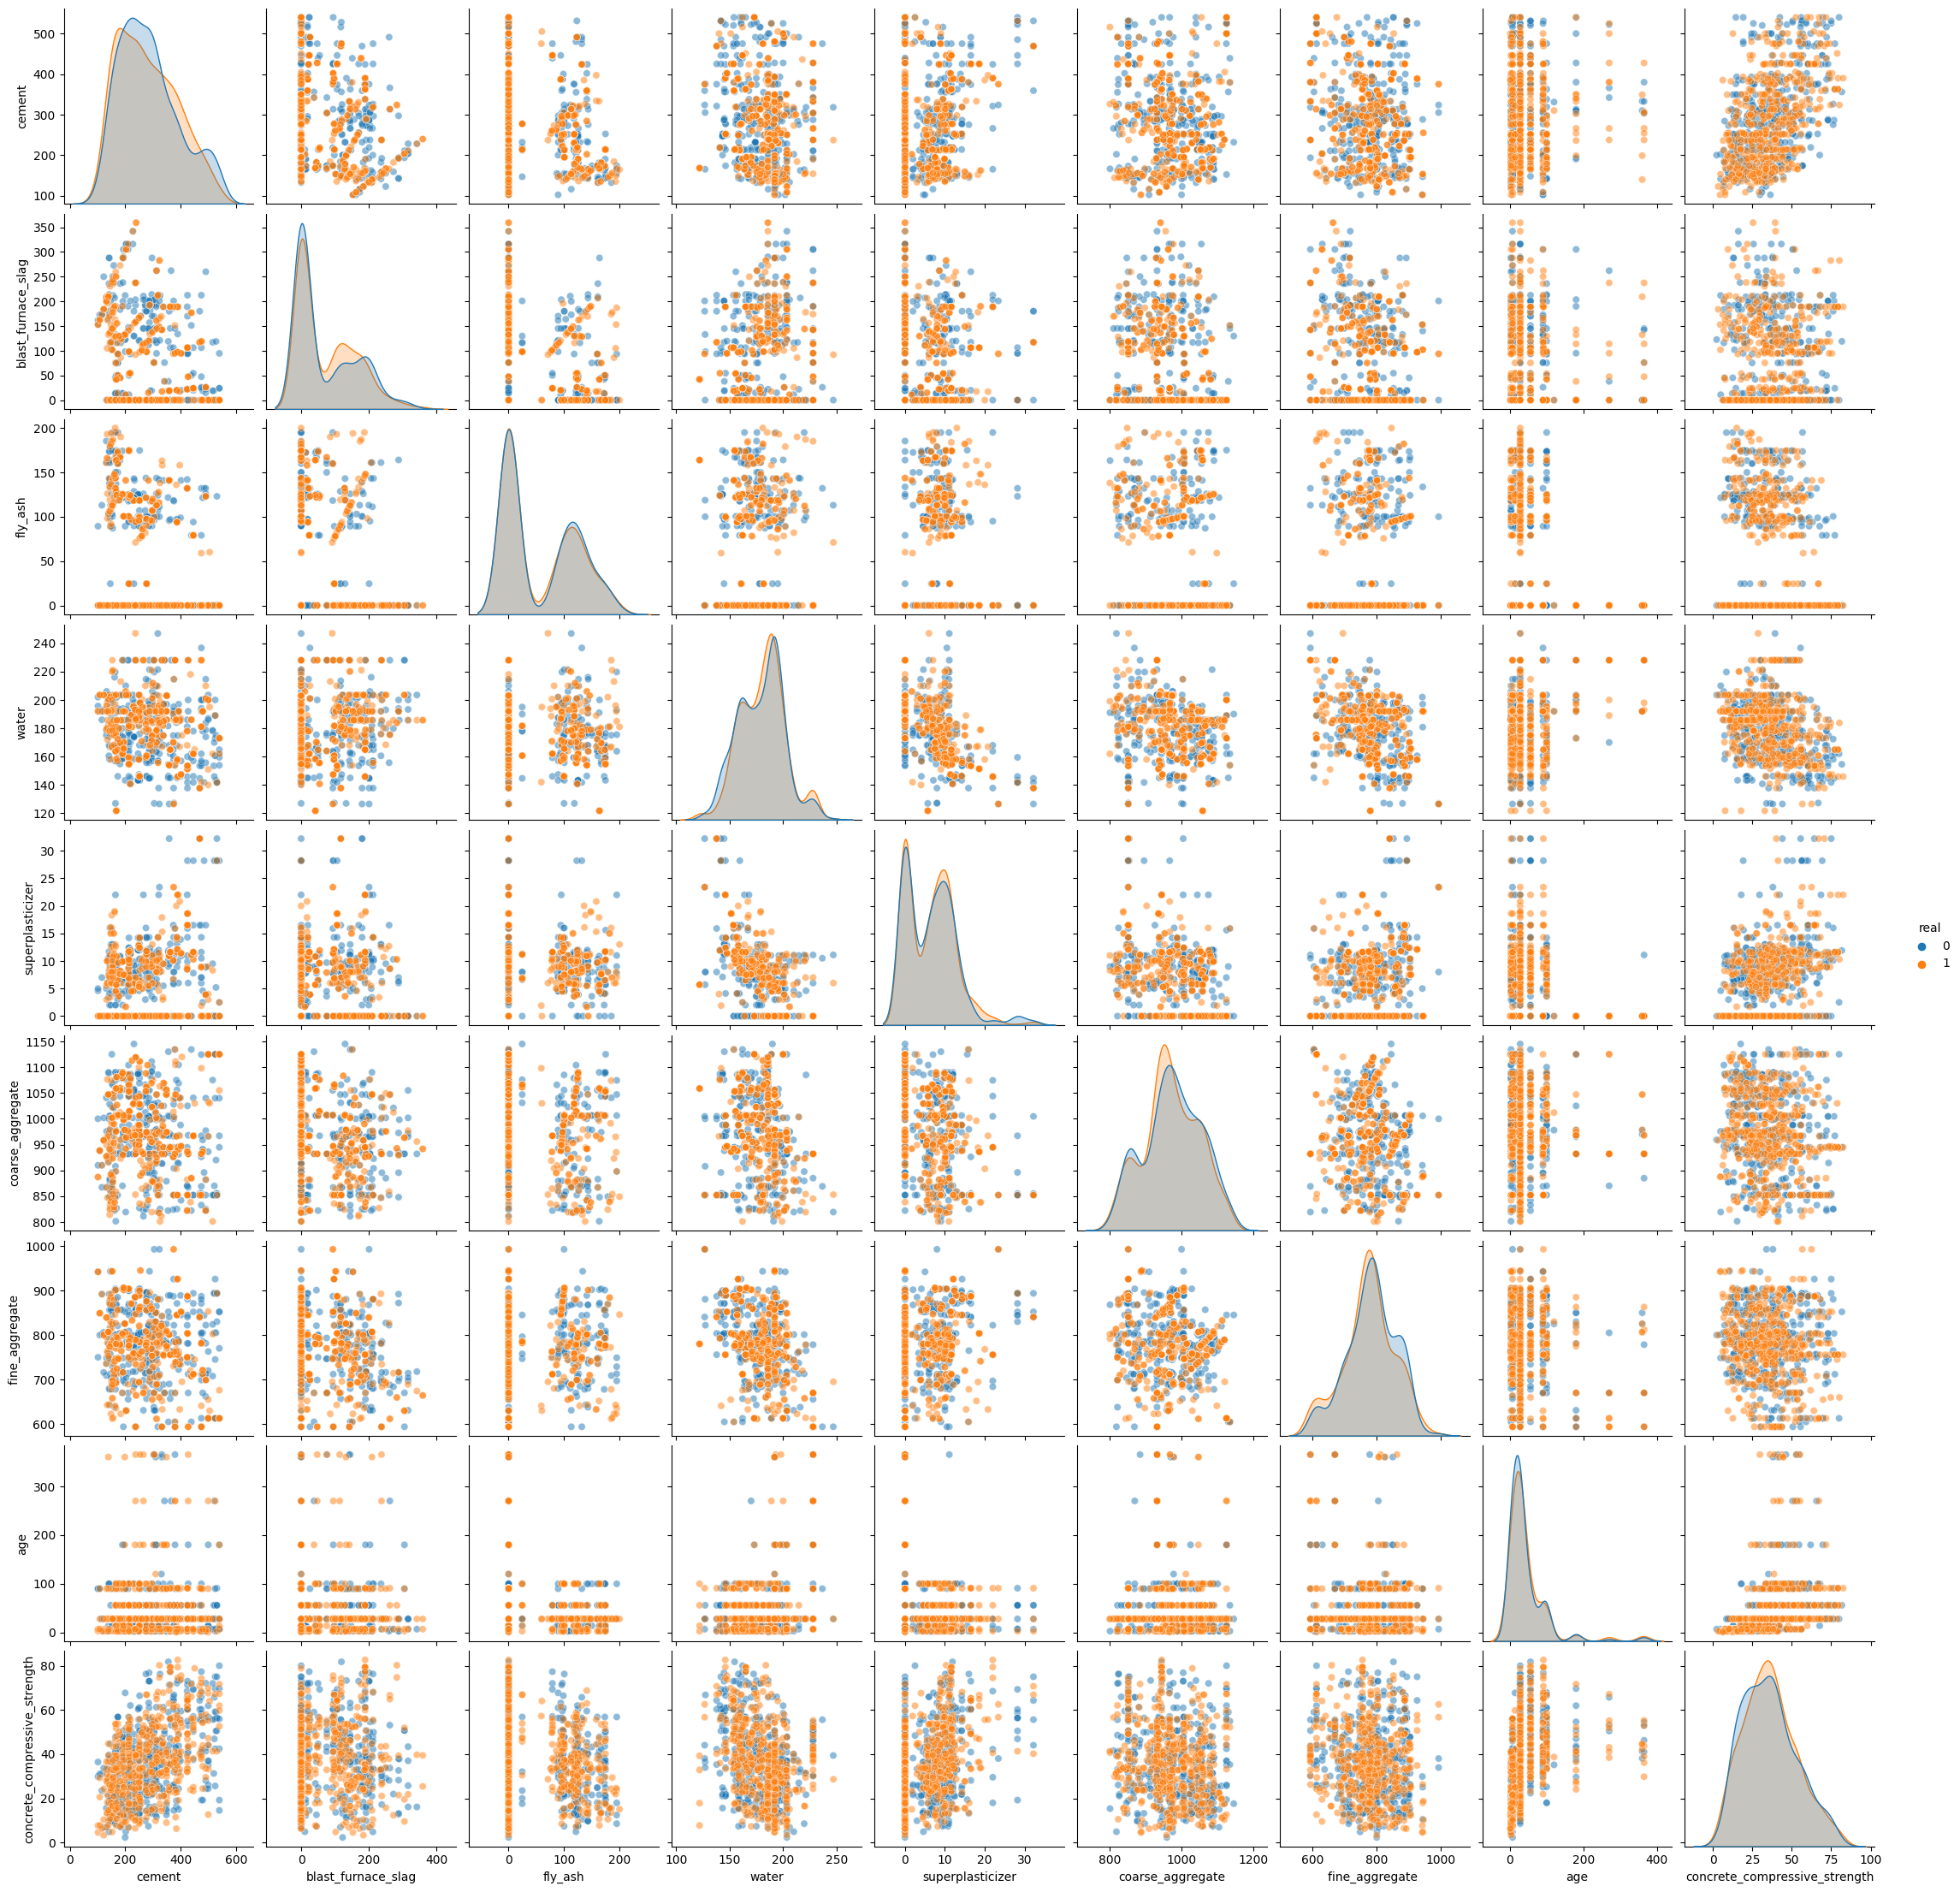

In [11]:
sns.pairplot(dataset_full, hue="real", diag_kind = 'kde', plot_kws={'alpha':0.5})

In [12]:
# adversarial modeling

df_train_adv, df_test_adv = train_test_split(dataset_full, test_size = 0.5)

X = df_train_adv[dataset_full.columns[:-1]]
Y = df_train_adv.iloc[:,-1]

reg = RandomForestClassifier(n_estimators=100, n_jobs=-1)
reg.fit(X, Y)


X_test = df_test_adv[dataset_full.columns[:-1]]
Y_test = df_test_adv.iloc[:,-1]

Y_test_pred = reg.predict(X_test)

print(f'accuracy_score: {accuracy_score(Y_test_pred, Y_test)}')

accuracy_score: 0.5728155339805825


In [13]:
# for loop for generating images and data
accuracy_list = []
for scan_step in range(30):

# sample generation
  samples = list()
  for s in range(515):
    # inizialaitaion of gibbs sampling from the traninig variable as if they were indipendnet
    # x = [np.random.choice(df_train[:,i]) for i in range(9)]
    x = [np.random.uniform(df_train[:,i].min(), df_train[:,i].max()) for i in range(9)]
    for n in range(scan_step):
      for i, x_i in enumerate(x):
        trees = models[i].estimators_
        est_to_use = np.random.randint(len(trees))
        x[i] = trees[est_to_use].predict([x[:i]+x[i+1:]])[0]
    samples.append(x)

  # plot and dataset
  dataset_simul = pd.DataFrame(samples, columns=dataset.columns)
  dataset_simul['real'] = 0
  test_dataset = pd.DataFrame(df_test, columns=dataset.columns)

  test_dataset['real'] = 1
  dataset_full = pd.concat([dataset_simul, test_dataset])

  dataset_full = dataset_full.reset_index(drop=True)

  plot = sns.pairplot(dataset_full, hue="real", diag_kind = 'kde', plot_kws={'alpha':0.5})
  fig = plot.fig
  fig.savefig(f"images/plot_{scan_step}.png") 
  plt.close()

  # adversarial modeling

  df_train_adv, df_test_adv = train_test_split(dataset_full, test_size = 0.5)

  X = df_train_adv[dataset_full.columns[:-1]]
  Y = df_train_adv.iloc[:,-1]

  reg = RandomForestClassifier(n_estimators=100, n_jobs=-1)
  reg.fit(X, Y)

  X_test = df_test_adv[dataset_full.columns[:-1]]
  Y_test = df_test_adv.iloc[:,-1]

  Y_test_pred = reg.predict(X_test)

  acc = accuracy_score(Y_test_pred, Y_test)
  accuracy_list.append(acc)
  print(f'-----{scan_step}------')
  print(f'accuracy_score: {acc}')

-----0------
accuracy_score: 0.9844660194174757
-----1------
accuracy_score: 0.7844660194174757
-----2------
accuracy_score: 0.7223300970873786
-----3------
accuracy_score: 0.6718446601941748
-----4------
accuracy_score: 0.6368932038834951
-----5------
accuracy_score: 0.6427184466019418
-----6------
accuracy_score: 0.6194174757281553
-----7------
accuracy_score: 0.5980582524271845
-----8------
accuracy_score: 0.6116504854368932
-----9------
accuracy_score: 0.5980582524271845
-----10------
accuracy_score: 0.6271844660194175
-----11------
accuracy_score: 0.6019417475728155
-----12------
accuracy_score: 0.5980582524271845
-----13------
accuracy_score: 0.6077669902912621
-----14------
accuracy_score: 0.6446601941747573
-----15------
accuracy_score: 0.574757281553398
-----16------
accuracy_score: 0.6213592233009708
-----17------
accuracy_score: 0.6097087378640776
-----18------
accuracy_score: 0.6
-----19------
accuracy_score: 0.6388349514563106
-----20------
accuracy_score: 0.61165048543689

Text(0, 0.5, 'Accuracy')

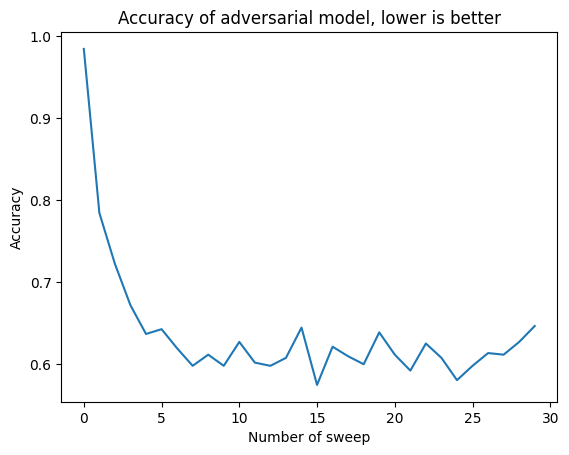

In [16]:
plt.plot(accuracy_list)
plt.title('Accuracy of adversarial model, lower is better')
plt.xlabel('Number of sweep')
plt.ylabel('Accuracy')